<a href="https://colab.research.google.com/github/mstivenzg/co2entregable/blob/master/Proyecto_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importa las bibliotecas necesarias
import gdown
import zipfile
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# URL del archivo compartido en Google Drive
url = 'https://drive.google.com/uc?id=1A5g_Y9g3YqW-PSDQjXtOqn2_UZYQ0MBq'

# Descarga el archivo .zip
gdown.download(url, 'archivo.zip', quiet=False)

# Descomprime el archivo .zip
with zipfile.ZipFile('archivo.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

# Carga los datos del archivo train.csv en una variable llamada data
data = pd.read_csv('train.csv')

# Muestra las primeras filas de los datos
print(data.head())


Downloading...
From: https://drive.google.com/uc?id=1A5g_Y9g3YqW-PSDQjXtOqn2_UZYQ0MBq
To: /content/archivo.zip
100%|██████████| 51.3M/51.3M [00:00<00:00, 231MB/s]


       ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
0  ID_-0.510_29.290_2019_00     -0.51      29.29  2019        0   
1  ID_-0.510_29.290_2019_01     -0.51      29.29  2019        1   
2  ID_-0.510_29.290_2019_02     -0.51      29.29  2019        2   
3  ID_-0.510_29.290_2019_03     -0.51      29.29  2019        3   
4  ID_-0.510_29.290_2019_04     -0.51      29.29  2019        4   

   SulphurDioxide_SO2_column_number_density  \
0                                 -0.000108   
1                                  0.000021   
2                                  0.000514   
3                                       NaN   
4                                 -0.000079   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                      0.603019   
1                                      0.728214   
2                                      0.748199   
3                                           NaN   
4                                      0.676296   

   Sulp

In [ ]:
data=pd.set_option('display.max_columns', None)#para ver todas las columnas
data = pd.read_csv('train.csv').fillna(0)#para reemplazar los NaN por ceros

PRIMER MODELO PREDICTIVO (Regressión con Bosques Aleatorios)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#Definimos la variable objetivo y las varibales independientes

X = data.drop(['ID_LAT_LON_YEAR_WEEK','year','week_no','emission'], axis=1)
y_true = data['emission']

In [ ]:
#Dividimos entre train set y de test set
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.2, random_state=42)

In [ ]:
# Entrenando el Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

In [ ]:
# Haciendo prediccion en el test set
y_pred = rf_model.predict(X_test)

In [ ]:
#Verificamos con el Root Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error")
print(rmse)

Root Mean Squared Error
27.919856619277812


SEGUNDO MODELO PREDICTIVO (XGBoost)

XGBoost - Root Mean Squared Error: 33.033947562557024
XGBoost - Evaluation with Real Data:
       True Values  Predictions
19931   116.547440   127.487503
46962    11.595166     5.350323
26915   261.624330   210.415268
69422    32.747440    28.034554
25605    19.810934    41.031334


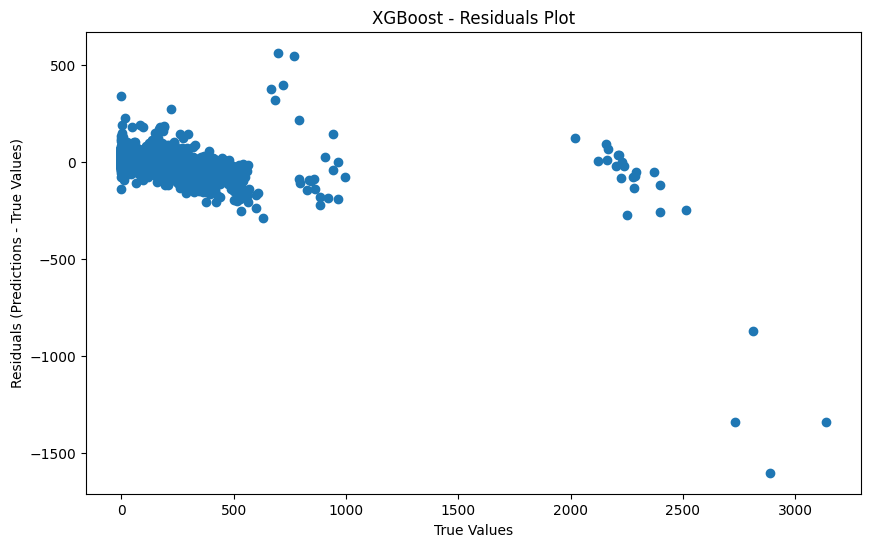

In [ ]:
# Importa las bibliotecas necesarias
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from matplotlib import pyplot as plt


# Divide los datos en características (X) y objetivo (y)
X = data.drop(['ID_LAT_LON_YEAR_WEEK', 'year', 'week_no', 'emission'], axis=1)
y = data['emission']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliza los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelo XGBoost
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print('XGBoost - Root Mean Squared Error:', rmse_xgb)


# Evaluación con datos reales
evaluation_xgb = pd.DataFrame({'True Values': y_test, 'Predictions': y_pred_xgb})
print('XGBoost - Evaluation with Real Data:')
print(evaluation_xgb.head())

# Visualización de diferencias
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb - y_test)
plt.xlabel('True Values')
plt.ylabel('Residuals (Predictions - True Values)')
plt.title('XGBoost - Residuals Plot')
plt.show()

TERCERO MODELO PREDICTIVO (ElasticNet)

ElasticNet - Root Mean Squared Error: 126.79215304204597
ElasticNet
ElasticNet - Evaluation with Real Data:
       True Values  Predictions
19931   116.547440    90.279118
46962    11.595166    68.328037
26915   261.624330    94.571688
69422    32.747440    93.136984
25605    19.810934    91.413663


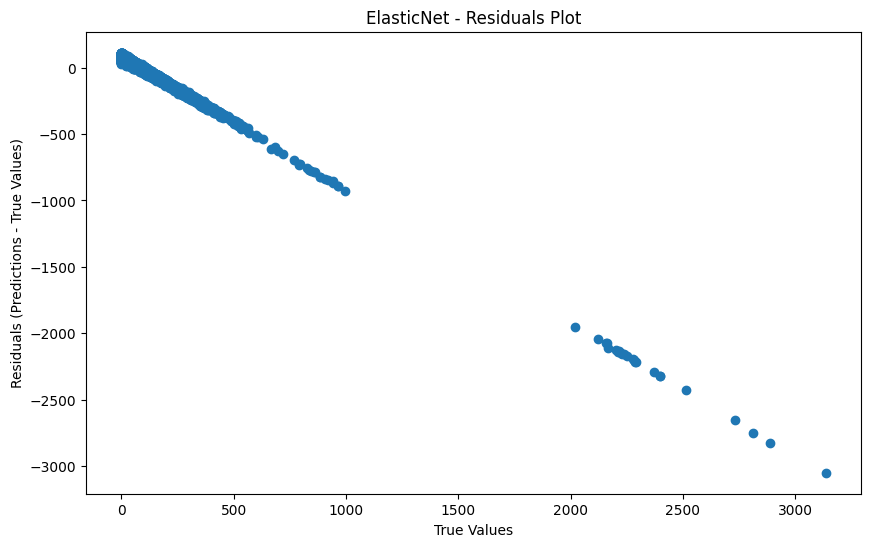

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet

# Divide los datos en características (X) y objetivo (y)
X = data.drop(['ID_LAT_LON_YEAR_WEEK', 'year', 'week_no', 'emission'], axis=1)
y = data['emission']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliza los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelo ElasticNet
elasticnet_model = ElasticNet()
elasticnet_model.fit(X_train, y_train)
y_pred_elasticnet = elasticnet_model.predict(X_test)
rmse_elasticnet = np.sqrt(mean_squared_error(y_test, y_pred_elasticnet))
print('ElasticNet - Root Mean Squared Error:', rmse_elasticnet)
print('ElasticNet')


# Evaluación con datos reales
evaluation_elasticnet = pd.DataFrame({'True Values': y_test, 'Predictions': y_pred_elasticnet})
print('ElasticNet - Evaluation with Real Data:')
print(evaluation_elasticnet.head())

# Visualización de diferencias
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_elasticnet - y_test)
plt.xlabel('True Values')
plt.ylabel('Residuals (Predictions - True Values)')
plt.title('ElasticNet - Residuals Plot')
plt.show()

CUARTO MODELO PREDICTIVO: Long Short-Term Memory (LSTM)

In [ ]:
#Librerias
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Definimos la variable objetivo y las varibales independientes

X = data.drop(['ID_LAT_LON_YEAR_WEEK','year','week_no','emission'], axis=1)
y_true = data['emission']


In [ ]:
# Normalizamos los datos para mejorar la convergencia del modelo
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_x.fit_transform(X)
y_true = scaler_y.fit_transform(y_true.reshape(-1, 1))


In [ ]:
#Dividimos los datos en train set y en test set
train_x, test_x, train_y, test_y = train_test_split(X, y_true, test_size=0.2, random_state=42)

In [ ]:
# Reorganización de datos para LSTM
def create_dataset(X, y, time_steps=1):
    Xs = []
    ys = []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
train_x, train_y = create_dataset(train_x, train_y, time_steps)
test_x, test_y = create_dataset(test_x, test_y, time_steps)

In [ ]:
#Definicion del modelo
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Entrenar el modelo
model.fit(train_x, train_y, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
1778/1778 [==============================] - 21s 9ms/step - loss: 0.0023 - val_loss: 0.0019
Epoch 2/50
1778/1778 [==============================] - 15s 9ms/step - loss: 0.0022 - val_loss: 0.0019
Epoch 3/50
1778/1778 [==============================] - 15s 8ms/step - loss: 0.0022 - val_loss: 0.0019
Epoch 4/50
1778/1778 [==============================] - 16s 9ms/step - loss: 0.0022 - val_loss: 0.0019
Epoch 5/50
1778/1778 [==============================] - 15s 8ms/step - loss: 0.0022 - val_loss: 0.0019
Epoch 6/50
1778/1778 [==============================] - 15s 8ms/step - loss: 0.0022 - val_loss: 0.0019
Epoch 7/50
1778/1778 [==============================] - 15s 8ms/step - loss: 0.0022 - val_loss: 0.0019
Epoch 8/50
1778/1778 [==============================] - 14s 8ms/step - loss: 0.0022 - val_loss: 0.0019
Epoch 9/50
1778/1778 [==============================] - 15s 8ms/step - loss: 0.0022 - val_loss: 0.0019
Epoch 10/50
1778/1778 [==============================] - 14s 8ms/step - l

In [ ]:
# Evaluación del modelo
predictions = model.predict(test_x)
predictions = scaler_y.inverse_transform(predictions)

#Deshacer la transformacion para los datos reales
y_true_inverse = scaler_y.inverse_transform(test_y.reshape(-1, 1))

#Verificamos con el Root Mean Squared Error
mse = mean_squared_error(y_true_inverse, predictions)
rmse = np.sqrt(mse)
print("Root Mean Squared Error")
print(rmse)

494/494 [==============================] - 2s 4ms/step
Root Mean Squared Error
0.04060961292380861


Model - Evaluation with Real Data:
   True Values  Predictions
0     0.006594     0.027624
1     0.003628     0.027624
2     0.111264     0.027624
3     0.009666     0.027624
4     0.012901     0.027624


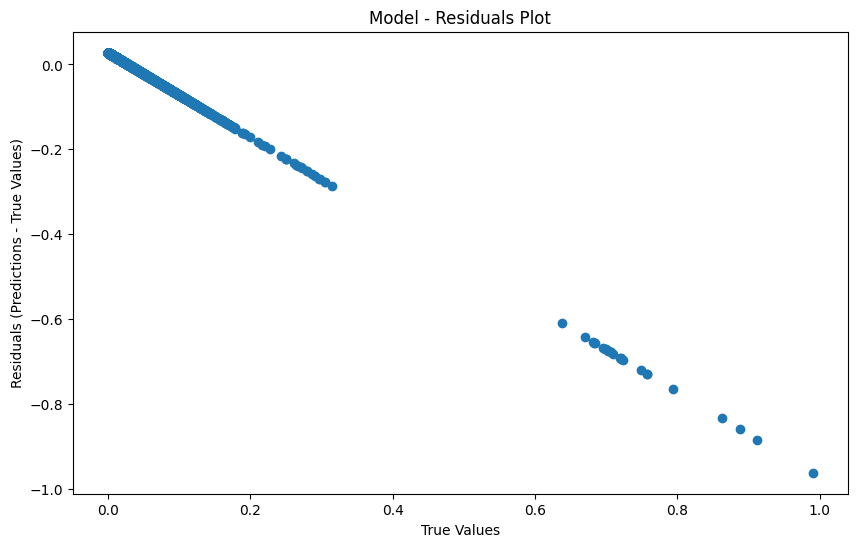

In [ ]:
# Evaluación con datos reales
evaluation_model = pd.DataFrame({'True Values': y_true_inverse.flatten(), 'Predictions': predictions.flatten()})
print('Model - Evaluation with Real Data:')
print(evaluation_model.head())

# Visualización de diferencias
plt.figure(figsize=(10, 6))
plt.scatter(y_true_inverse, predictions - y_true_inverse)
plt.xlabel('True Values')
plt.ylabel('Residuals (Predictions - True Values)')
plt.title('Model - Residuals Plot')
plt.show()
